<a href="https://www.kaggle.com/code/mahendrasinghrajpoot/shell-competition?scriptVersionId=116785432" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the dataset

In [2]:
de_hist = pd.read_csv("../input/ev-infrastructure-dataset/Demand_History.csv")
exsist = pd.read_csv("../input/ev-infrastructure-dataset/exisiting_EV_infrastructure_2018.csv")
sample = pd.read_csv("../input/ev-infrastructure-dataset/sample_submission.csv")

# Starting with the EDA

Demand_History.csv: A time-series of EV charging demand over a region. We have 
considered demand map of 64x64 equi-spaced points. For ease of use, we have 
flattened the demand map and provided the index, x-coordinate and y-coordinate of 
each demand point. Demand history is provided from year 2010 to 2018.

In [3]:
de_hist.head()

,demand_point_index,x_coordinate,y_coordinate,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,0,0.5,0.5,0.352242,0.667932,0.958593,2.911901,4.338274,6.561995,8.454417,10.595324,13.119572
1,1,1.5,0.5,0.325940,0.591964,0.862652,2.589068,4.196034,5.745551,8.753195,11.126995,12.020091
2,2,2.5,0.5,0.373752,0.591890,0.969733,2.641432,3.541772,5.469161,8.414627,10.115336,14.018254
3,3,3.5,0.5,0.420686,0.584055,0.906547,2.378577,3.888121,5.846089,9.083868,12.424885,15.012302
4,4,4.5,0.5,0.475621,0.647940,0.981544,2.665400,4.218711,6.776609,8.851107,11.731131,16.355563


In [4]:
de_hist.describe()

,demand_point_index,x_coordinate,y_coordinate,2010,2011,2012,2013,2014,2015,2016,2017,2018
count,4096.00000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000
mean,2047.50000,32.000000,32.000000,1.993306,4.017967,7.552549,19.323394,31.891712,42.249471,58.718724,75.805574,88.264071
std,1182.55768,18.475209,18.475209,1.849883,4.003144,7.658317,19.080365,31.270080,39.501338,56.133565,76.390728,79.513884
min,0.00000,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1023.75000,16.250000,16.250000,0.474756,0.898346,1.613829,4.480010,6.958344,10.634926,15.245858,22.668290,25.275349
50%,2047.50000,32.000000,32.000000,1.163430,2.134510,3.854949,10.045907,17.872258,24.146146,31.755415,37.285351,54.567937
75%,3071.25000,47.750000,47.750000,3.665382,6.996849,13.579687,34.418367,56.016385,77.892036,108.528007,138.112588,158.637564
max,4095.00000,63.500000,63.500000,6.641083,14.961144,28.383260,70.789208,117.063595,148.491476,219.652855,302.729826,317.422418


> we can say that there is extensive increase in the amount of demand that is generated over the years.

In [5]:
de_hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4096 entries, 0 to 4095
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   demand_point_index  4096 non-null   int64  
 1   x_coordinate        4096 non-null   float64
 2   y_coordinate        4096 non-null   float64
 3   2010                4096 non-null   float64
 4   2011                4096 non-null   float64
 5   2012                4096 non-null   float64
 6   2013                4096 non-null   float64
 7   2014                4096 non-null   float64
 8   2015                4096 non-null   float64
 9   2016                4096 non-null   float64
 10  2017                4096 non-null   float64
 11  2018                4096 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 384.1 KB


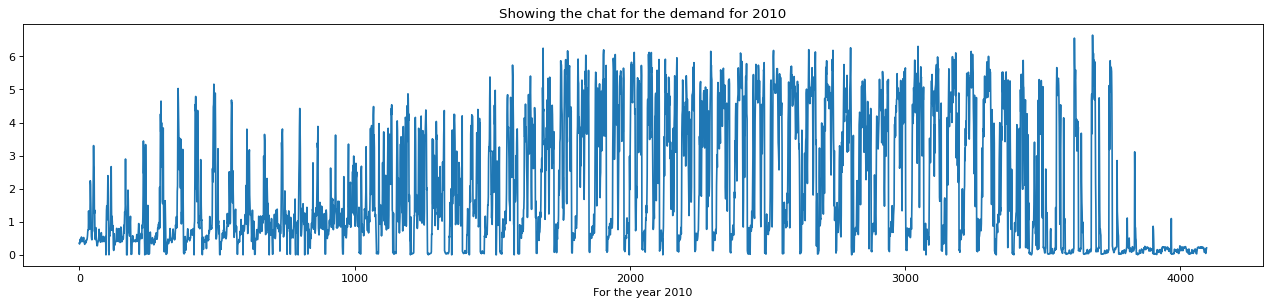

In [6]:
from matplotlib.pyplot import figure

figure(figsize=(20, 4), dpi=80)
plt.plot(de_hist['2010'])
plt.title("Showing the chat for the demand for 2010")
plt.xlabel("For the year 2010")
plt.show()

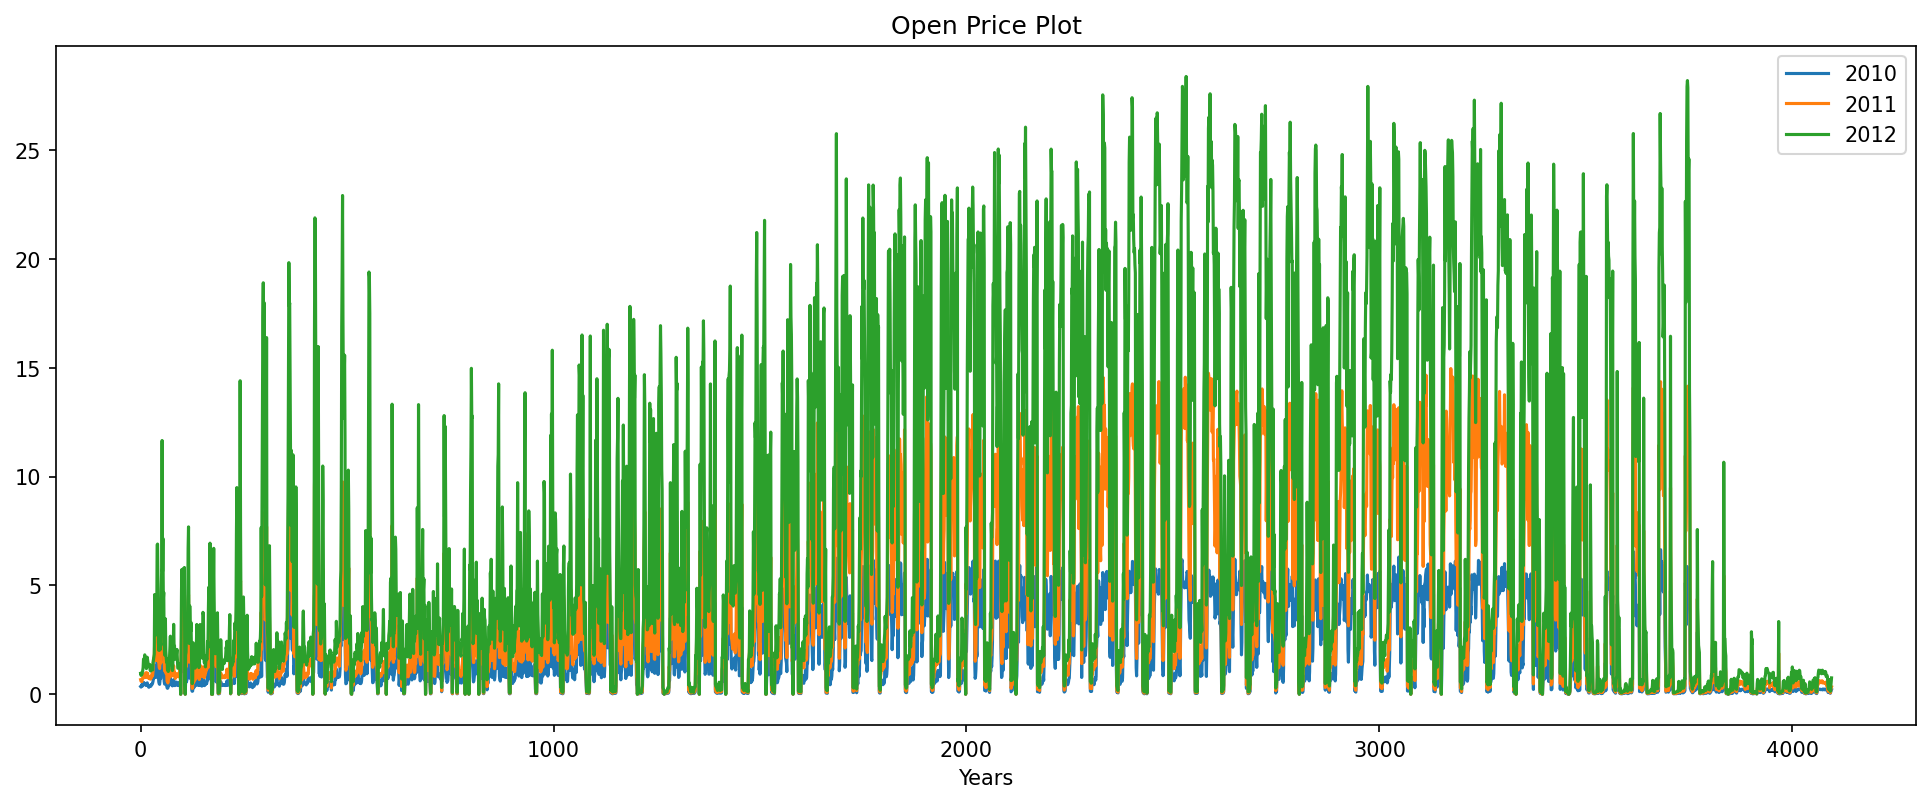

In [7]:
# to set the plot size
plt.figure(figsize=(16, 6), dpi=150)
  
# using plot method to plot open prices.
# in plot method we set the label and color of the curve.
de_hist['2010'].plot(label='2010')
de_hist['2011'].plot(label='2011')
de_hist['2012'].plot(label='2012')
  
# adding title to the plot
plt.title('Open Price Plot')
  
# adding Label to the x-axis
plt.xlabel('Years')
  
# adding legend to the curve
plt.legend()

Existing_EV_infrastructure_2018.csv: Details of the existing EV infrastructure of year 
2018. This dataset comprises of index, x-coordinate and y-coordinate of each of the 
100 parking locations (supply points). It also provides the maximum number of parking 
slots available at each parking location along with the number of SCS and FCS 
already in place as of 2018.

In [8]:
exsist.head() #2018

,supply_point_index,x_coordinate,y_coordinate,total_parking_slots,existing_num_SCS,existing_num_FCS
0,0,50.163110,19.412014,23,5,3
1,1,37.336451,58.119225,27,4,7
2,2,46.709232,57.525650,31,6,14
3,3,30.528626,55.379835,26,5,5
4,4,51.521781,35.116755,32,11,6


# Target

Using the above data, you are required to forecast demand and optimize EV infrastructure 
for year 2019 and 2020 under certain practical constraints.

In [9]:
sample.head()

,year,data_type,demand_point_index,supply_point_index,value
0,2019,SCS,NaN,0,5.0
1,2019,SCS,NaN,1,4.0
2,2019,SCS,NaN,2,6.0
3,2019,SCS,NaN,3,5.0
4,2019,SCS,NaN,4,11.0


In [10]:
dataset = [de_hist , exsist , sample]

for i in dataset:
    print(i.shape)

(4096, 12)
(100, 6)
(819600, 5)


In [11]:
sample.shape

(819600, 5)